# practise_chapter_09

## ma_feature_eng

In [2]:
import pandas as pd

ds = pd.read_csv(
    "../data/daily-total-female-births.csv", index_col=0, header=0, parse_dates=True
).squeeze()

In [12]:
df = pd.DataFrame(ds.values)
df.head(), df.tail()

(    0
 0  35
 1  32
 2  30
 3  31
 4  44,
       0
 360  37
 361  52
 362  48
 363  55
 364  50)

In [13]:
lag1 = df.shift(1)
lag1.head(), lag1.tail()

(      0
 0   NaN
 1  35.0
 2  32.0
 3  30.0
 4  31.0,
         0
 360  34.0
 361  37.0
 362  52.0
 363  48.0
 364  55.0)

In [14]:
width = 3

In [15]:
lag3 = df.shift(width - 1)

lag3.head(), lag3.tail()

(      0
 0   NaN
 1   NaN
 2  35.0
 3  32.0
 4  30.0,
         0
 360  44.0
 361  34.0
 362  37.0
 363  52.0
 364  48.0)

In [17]:
window = lag3.rolling(window=width)
window

Rolling [window=3,center=False,axis=0,method=single]

In [20]:
means = window.mean()
means.head()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,32.333333


In [19]:
lag1.head()

,0
0,NaN
1,35.0
2,32.0
3,30.0
4,31.0


In [21]:
df.head()

,0
0,35
1,32
2,30
3,31
4,44


In [ ]:
dataframe = pd.concat([means, lag1, df], axis=1)
dataframe.columns = ["mean", "t", "t+1"]
dataframe.head()

# (35 + 32 + 31) / 3 =  32.333333

,mean,t,t+1
0,NaN,NaN,35
1,NaN,35.0,32
2,NaN,32.0,30
3,NaN,30.0,31
4,32.333333,31.0,44


## ma_prediction

In [32]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [33]:
ds = pd.read_csv(
    "../data/daily-total-female-births.csv", header=0, index_col=0, parse_dates=True
).squeeze()

ds.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

In [34]:
X = ds.values
X[:5]

array([35, 32, 30, 31, 44])

In [35]:
window = 3
history = [X[i] for i in range(window)]
history[:5]

[35, 32, 30]

In [36]:
test = [X[i] for i in range(window, len(X))]
test[:10]

[31, 44, 29, 45, 43, 38, 27, 38, 33, 55]

In [37]:
predictions = list()
predictions

[]

In [38]:
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length - window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    # print("predicted=%f, expected=%f" % (yhat, obs))

Test RMSE: 7.834


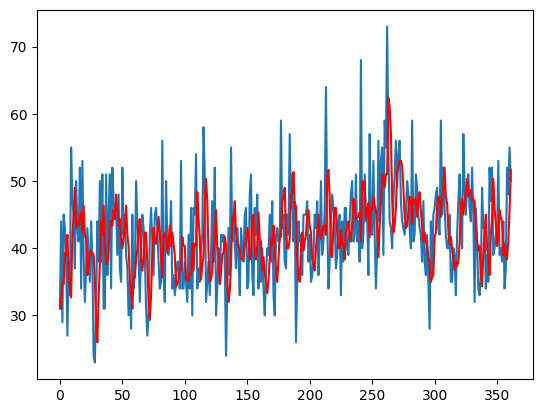

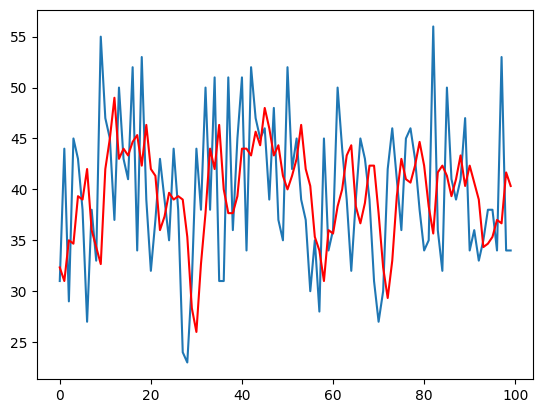

In [39]:
rmse = math.sqrt(mean_squared_error(test, predictions))
print("Test RMSE: %.3f" % rmse)
# plot
plt.plot(test)
plt.plot(predictions, color="red")
plt.show()
# zoom plot
plt.plot(test[:100])
plt.plot(predictions[:100], color="red")
plt.show()

## ma_data_prep

In [40]:
ds.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

In [41]:
rolling = ds.rolling(window=3)
rolling

Rolling [window=3,center=False,axis=0,method=single]

In [42]:
rolling_mean = rolling.mean()
rolling_mean.head()  #

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
Name: Births, dtype: float64

<Axes: xlabel='Date'>

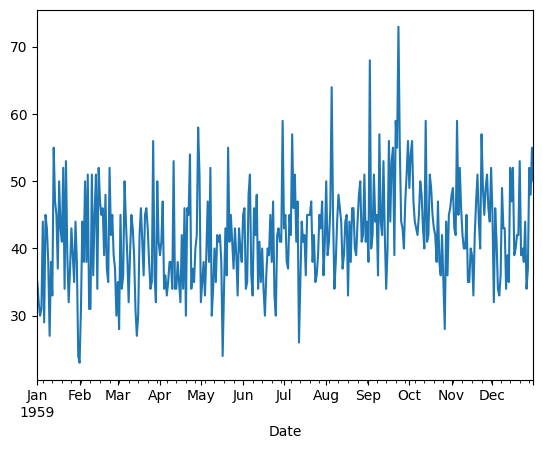

In [43]:
ds.plot()

<Axes: xlabel='Date'>

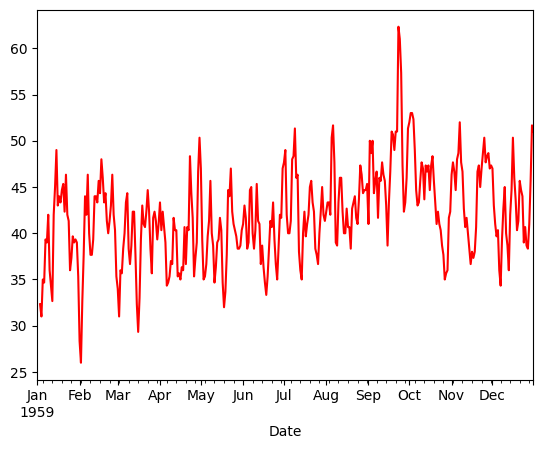

In [44]:
rolling_mean.plot(color="red")

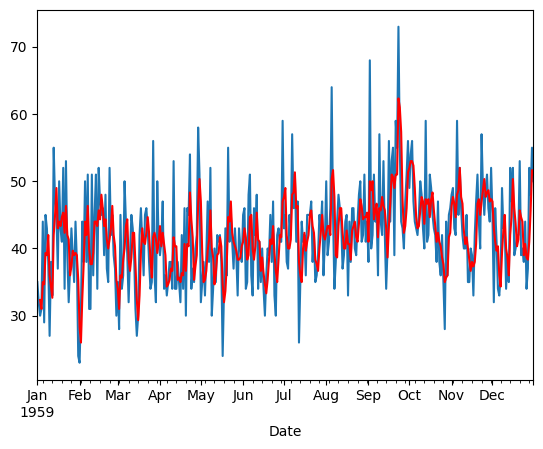

In [45]:
import matplotlib.pyplot as plt

ds.plot()
rolling_mean.plot(color="red")
plt.show()

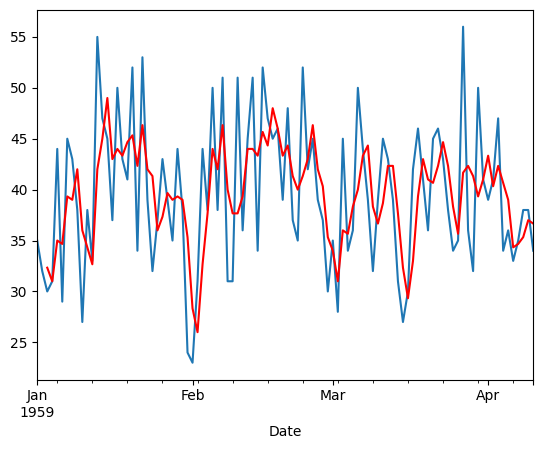

In [46]:
# zoomed plot original and transformed dataset
ds[:100].plot()
rolling_mean[:100].plot(color="red")
plt.show()